In [51]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [52]:
for i in range(10):
    if i==0:
        train = pd.read_csv('salida/resultados/DEV/anterior/DEV_'+str(i+1)+'.csv.csv')
    else:
        try:
            temp = pd.read_csv('salida/resultados/DEV/anterior/DEV_'+str(i+1)+'.csv.csv')
            train=pd.concat([train,temp])
        except:
            pass

In [53]:
train=train.reset_index(drop=True)
train

,suma,distancias,entropias,mutual_info,m_earth,max_info_p,antonimos,relaciones,sim_faltantes,CLASS
0,1.737862,444.139340,2.171,18.485967,4.795427,0.221737,0,0,0.370076,neutral
1,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,entailment
2,0.184317,54.673412,0.918,5.355900,0.621447,0.201964,0,2,0.093524,contradiction
3,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0,1,1.000000,entailment
4,2.246893,132.263780,2.121,24.697300,7.003735,0.383457,0,0,0.306185,neutral
...,...,...,...,...,...,...,...,...,...,...
9837,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0,1,1.000000,entailment
9838,0.513102,79.567760,1.500,7.220168,1.176182,0.219640,0,2,0.206587,contradiction
9839,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0,2,1.000000,entailment
9840,6.751493,192.237370,2.887,50.469680,9.478166,0.647039,0,0,0.433746,contradiction


In [54]:
train

,suma,distancias,entropias,mutual_info,m_earth,max_info_p,antonimos,relaciones,sim_faltantes,CLASS
0,1.737862,444.139340,2.171,18.485967,4.795427,0.221737,0,0,0.370076,neutral
1,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,entailment
2,0.184317,54.673412,0.918,5.355900,0.621447,0.201964,0,2,0.093524,contradiction
3,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0,1,1.000000,entailment
4,2.246893,132.263780,2.121,24.697300,7.003735,0.383457,0,0,0.306185,neutral
...,...,...,...,...,...,...,...,...,...,...
9837,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0,1,1.000000,entailment
9838,0.513102,79.567760,1.500,7.220168,1.176182,0.219640,0,2,0.206587,contradiction
9839,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0,2,1.000000,entailment
9840,6.751493,192.237370,2.887,50.469680,9.478166,0.647039,0,0,0.433746,contradiction


In [55]:
train=train.drop(["antonimos","suma","distancias","sim_faltantes"],axis=1)
train

,entropias,mutual_info,m_earth,max_info_p,relaciones,CLASS
0,2.171,18.485967,4.795427,0.221737,0,neutral
1,0.000,0.000000,0.000000,0.000000,0,entailment
2,0.918,5.355900,0.621447,0.201964,2,contradiction
3,0.000,0.000000,0.000000,0.000000,1,entailment
4,2.121,24.697300,7.003735,0.383457,0,neutral
...,...,...,...,...,...,...
9837,0.000,0.000000,0.000000,0.000000,1,entailment
9838,1.500,7.220168,1.176182,0.219640,2,contradiction
9839,0.000,0.000000,0.000000,0.000000,2,entailment
9840,2.887,50.469680,9.478166,0.647039,0,contradiction


In [56]:
X = train.drop(['CLASS'],axis=1)
y_ = train['CLASS']

In [57]:
# SNLI
y_train=[]
for i in y_:
    if i == "entailment":
        y_train.append(1)
    elif i== "neutral":
        y_train.append(2)
    else:
        y_train.append(0)

In [58]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

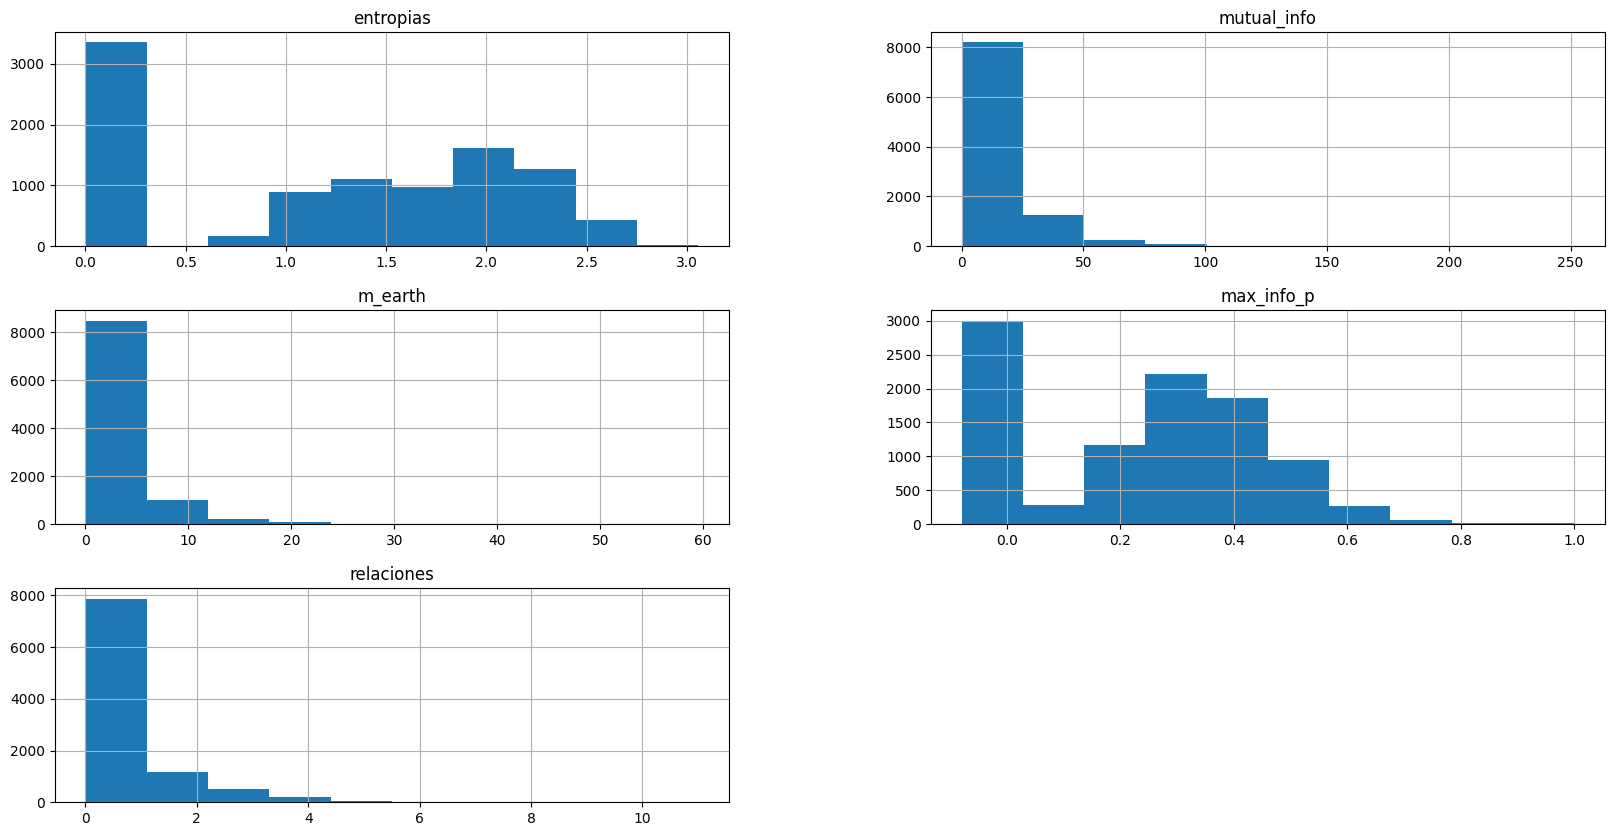

In [59]:
train.hist(figsize=(20,10))
plt.show()

In [60]:
for i in range(10):
    if i==0:
        test = pd.read_csv('salida/resultados/TEST/anterior/TEST_'+str(i+1)+'.csv.csv')
    else:
        temp = pd.read_csv('salida/resultados/TEST/anterior/TEST_'+str(i+1)+'.csv.csv')
        test=pd.concat([test,temp])

In [61]:
test=test.reset_index(drop=True)
test

,suma,distancias,entropias,mutual_info,m_earth,max_info_p,antonimos,relaciones,sim_faltantes,CLASS
0,3.410695,286.254600,2.122,44.926754,7.810236,0.312829,0,0,0.261770,neutral
1,1.386781,80.410820,1.842,13.170551,1.784495,0.361612,0,0,0.322572,entailment
2,1.481246,188.950070,1.689,24.548238,5.686923,0.179753,0,1,0.233885,contradiction
3,1.057889,78.905580,1.918,10.884116,2.106378,0.331889,0,0,0.302964,neutral
4,1.160878,72.602130,1.371,8.902093,1.505584,0.469705,0,0,0.357623,entailment
...,...,...,...,...,...,...,...,...,...,...
9813,0.805369,107.208130,0.000,3.249580,0.527492,0.402684,0,2,0.455445,contradiction
9814,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,1,1,1.000000,entailment
9815,1.087521,99.046364,2.236,11.764733,2.026360,0.363617,0,1,0.252254,contradiction
9816,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,entailment


In [62]:
#test["relaciones"]=test["relaciones"]+test["antonimos"]

In [63]:
test=test.drop(["antonimos","suma","distancias","sim_faltantes"],axis=1)
test

,entropias,mutual_info,m_earth,max_info_p,relaciones,CLASS
0,2.122,44.926754,7.810236,0.312829,0,neutral
1,1.842,13.170551,1.784495,0.361612,0,entailment
2,1.689,24.548238,5.686923,0.179753,1,contradiction
3,1.918,10.884116,2.106378,0.331889,0,neutral
4,1.371,8.902093,1.505584,0.469705,0,entailment
...,...,...,...,...,...,...
9813,0.000,3.249580,0.527492,0.402684,2,contradiction
9814,0.000,0.000000,0.000000,0.000000,1,entailment
9815,2.236,11.764733,2.026360,0.363617,1,contradiction
9816,0.000,0.000000,0.000000,0.000000,0,entailment


In [64]:
X_t = test.drop(['CLASS'],axis=1)
y_t = test['CLASS']

In [65]:
# SNLI
y_test=[]
for i in y_t:
    if i == "entailment":
        y_test.append(1)
    elif i== "neutral":
        y_test.append(2)
    else:
        y_test.append(0)

In [66]:
scaler = preprocessing.StandardScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [67]:
# grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}# l1 lasso l2 ridge
# logreg=linear_model.LogisticRegression()
# logreg_cv=GridSearchCV(logreg,grid,cv=20)
# logreg_cv.fit(X_train,y_train)

In [68]:
# print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
# print("accuracy :",logreg_cv.best_score_)

In [69]:
model = LogisticRegression(penalty="l2", C=1)
model.fit(X_train,y_train)

LogisticRegression(C=1)

In [70]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [71]:
model.decision_function(X)

array([[ 0.16942048, -0.58958203,  0.42016155],
       [-0.58842394,  0.87389581, -0.28547188],
       [ 0.11995724, -0.15104859,  0.03109134],
       ...,
       [-0.20670646,  0.36069423, -0.15398776],
       [ 0.93588144, -1.58616837,  0.65028693],
       [ 1.36115011, -2.70070331,  1.3395532 ]])

In [72]:
labels=train.columns[:-1]
labels

Index(['entropias', 'mutual_info', 'm_earth', 'max_info_p', 'relaciones'], dtype='object')

In [73]:
model.classes_

array([0, 1, 2])

In [74]:
model.coef_[0]

array([ 0.18676102,  0.3055014 , -0.06154226,  0.05320988,  0.20673887])

In [75]:
coeficientes=model.coef_[0]

In [76]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  1 mutual_info 2 m_earth


In [77]:
n_columns=train.shape[1]-1

In [78]:
n_columns

5

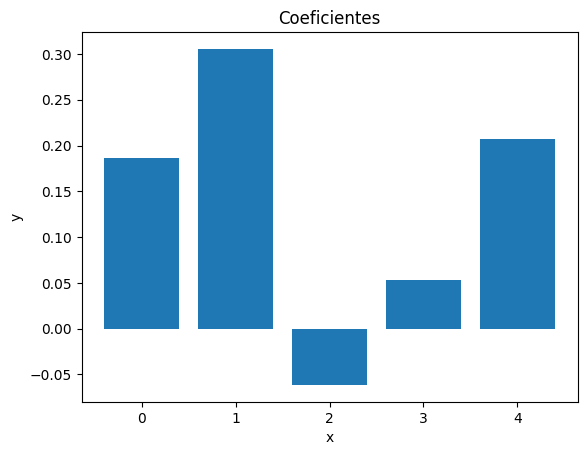

In [79]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [80]:
predictions = model.predict(X_test)

In [134]:
print(confusion_matrix(y_test, predictions))

[[1423  963  849]
 [ 650 2359  357]
 [1176 1069  972]]


In [136]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions,average='weighted'),2))
print("recall",round(recall_score(y_test,predictions,average='weighted'),2))
print("f1_score: ",round(f1_score(y_test,predictions,average='weighted'),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.48
precision:  0.47
recall 0.48
f1_score:  0.47
matthews_score:  0.23


In [83]:
X_train.shape

(9842, 5)

In [84]:
X_test.shape

(9818, 5)

In [85]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [118]:
validation_size = 0.10
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [119]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.480000 (0.018968)


In [120]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_weighted')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.470000 (0.019315)


In [121]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_weighted')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.480000 (0.018968)


In [122]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_weighted')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.470000 (0.019337)


In [123]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.230000 (0.027964)


In [124]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

In [125]:
#linear_model

In [126]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [127]:
y_predict = model.predict(X_test)
print(classification_report(y_predict, y_test))

              precision    recall  f1-score   support

           0       0.44      0.44      0.44      3249
           1       0.70      0.54      0.61      4391
           2       0.30      0.45      0.36      2178

    accuracy                           0.48      9818
   macro avg       0.48      0.47      0.47      9818
weighted avg       0.53      0.48      0.50      9818



In [128]:
explainer = shap.LinearExplainer(model,X_train,feature_names=test.columns[:-1])
shap_values = explainer(X_test)

In [129]:
explainer.expected_value

array([ 0.04735565, -0.12790335,  0.0805477 ])

In [130]:
explainer.coef[0]

array([ 0.18676102,  0.3055014 , -0.06154226,  0.05320988,  0.20673887])

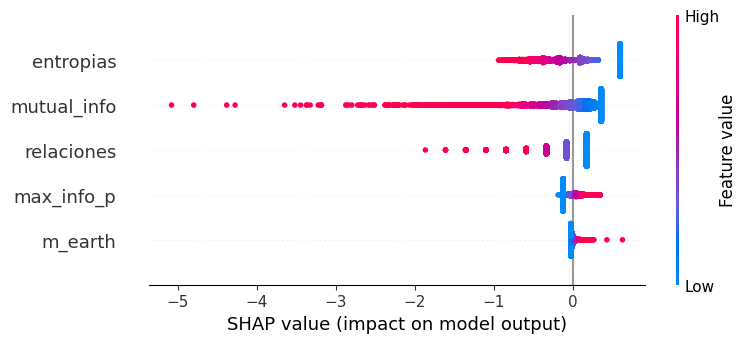

In [131]:
shap.plots.beeswarm(shap_values[:,:,1])

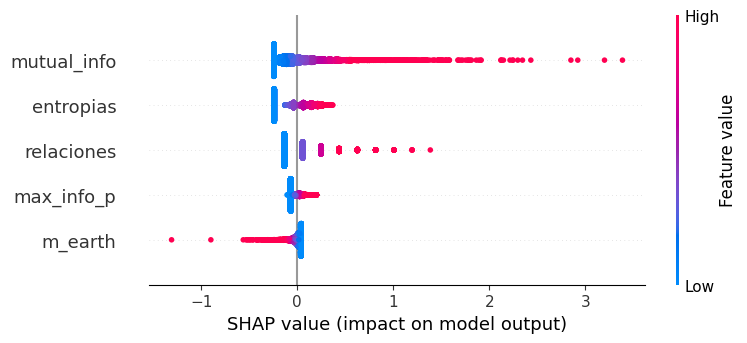

In [132]:
shap.plots.beeswarm(shap_values[:,:,0])

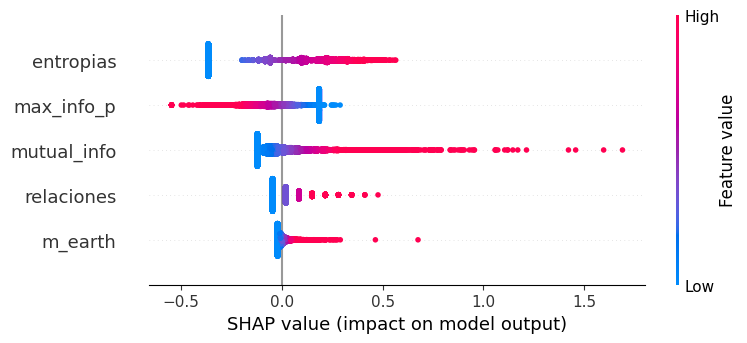

In [133]:
shap.plots.beeswarm(shap_values[:,:,2])